# Model Development

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# path of data 
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Linear Regression and Multiple Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [7]:
X = df[['highway-mpg']]
Y = df['price']

In [8]:
lm.fit(X,Y)

LinearRegression()

In [9]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
lm.intercept_

38423.3058581574

In [11]:
lm.coef_

array([-821.73337832])

### Question #1 a):

In [12]:
# Create a linear regression object?
lm1 = LinearRegression()
lm1

LinearRegression()

### Question #1 b):

In [13]:
# Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?
X1 = df[['engine-size']]
Y1 = df['price']

In [14]:
lm1.fit(X1,Y1)

LinearRegression()

### Question #1 c):

In [15]:
# Find the slope and intercept of the model?
lm1.intercept_

-7963.338906281024

In [16]:
lm1.coef_

array([166.86001569])

### Question #1 d): 

In [17]:
# What is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'?
Y1hat = lm1.predict(X1)
Y1hat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [18]:
lm1.intercept_

-7963.338906281024

In [19]:
lm1.coef_

array([166.86001569])

### Multiple Linear Regression

In [20]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [21]:
lm.fit(Z, df['price'])

LinearRegression()

In [22]:
lm.intercept_

-15806.62462632923

In [23]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### Question #2 a):

In [24]:
# Create and train a Multiple Linear Regression model "lm2" where the response
# variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2

LinearRegression()

In [25]:
X2 = df[['normalized-losses','highway-mpg']]
Y2 = df['price']

In [26]:
lm2.fit(X2,Y2)

LinearRegression()

### Question #2 b):

In [28]:
# Find the coefficient of the model?
lm2.intercept_

38201.31327245727

In [29]:
lm2.coef_

array([   1.49789586, -820.45434016])

### Model Evaluation using Visualization

In [30]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

### Regression Plot

(0.0, 48159.01280921515)

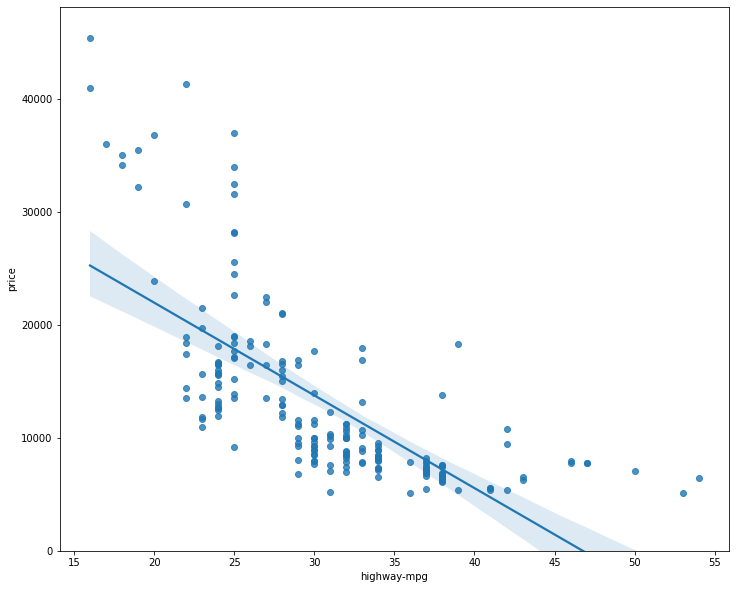

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

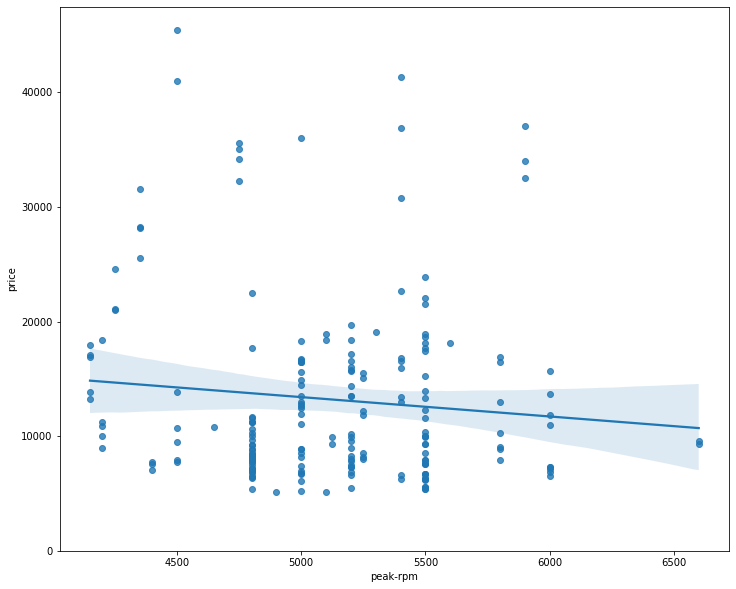

In [32]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### Question #3:

In [33]:
# Given the regression plots above is "peak-rpm" or "highway-mpg" more 
# strongly correlated with "price". Use the method ".corr()" to verify your answer.
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


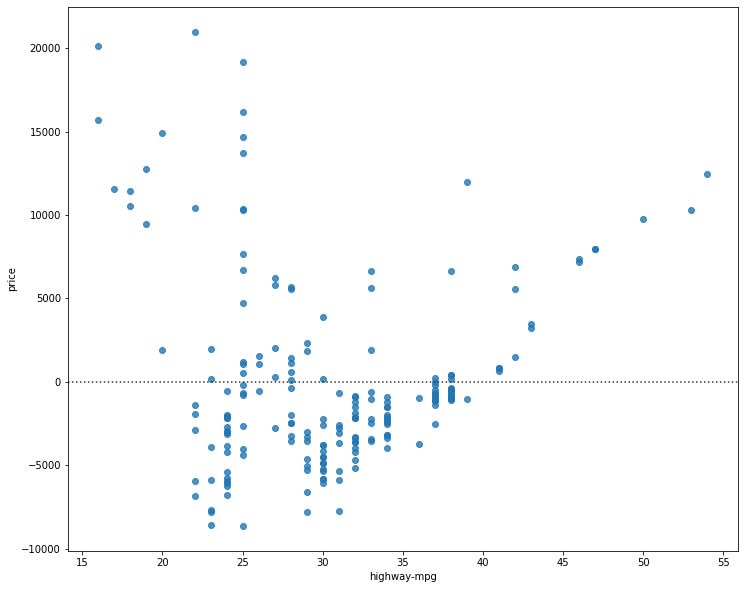

In [34]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

### Multiple Linear Regression

In [35]:
Y_hat = lm.predict(Z)

C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


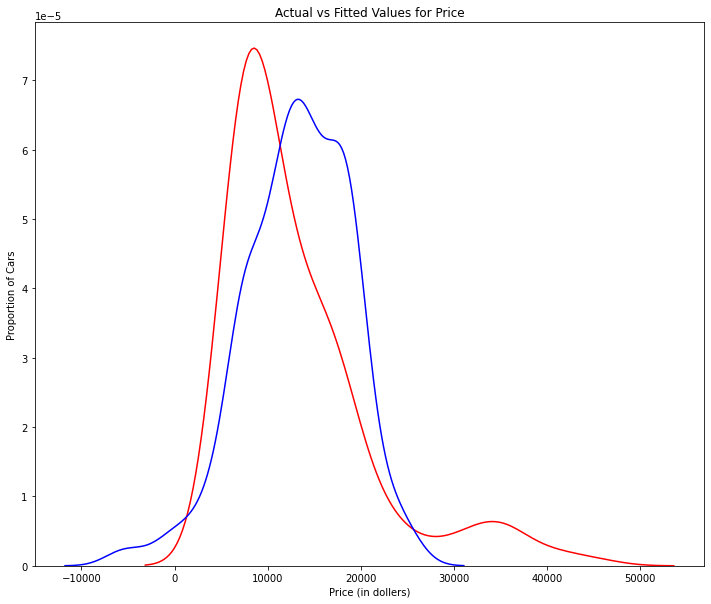

In [36]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel('Price (in dollers)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Polynomial Regression and Pipelines

In [38]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [39]:
x = df['highway-mpg']
y = df['price']

In [40]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


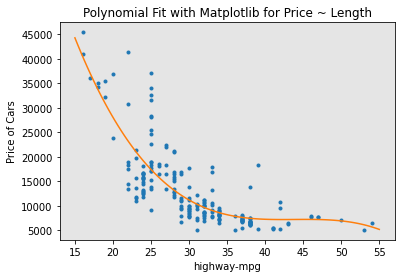

In [41]:
PlotPolly(p, x, y, 'highway-mpg')

In [42]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

### Question #4:

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


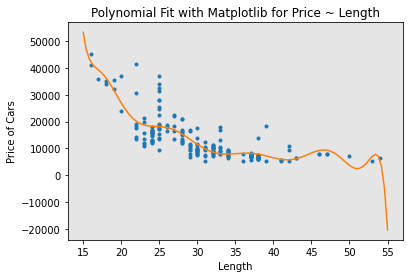

In [43]:
# Create 11 order polynomial model with the variables x and y from above?
f1 = np.polyfit(x,y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, "Length")

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [46]:
Z_pr = pr.fit_transform(Z)

In [47]:
Z.shape

(201, 4)

In [48]:
Z_pr.shape

(201, 15)

### Pipeline

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [50]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [51]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [53]:
ypipe = pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

### Question #5:

In [54]:
# Create a pipeline that Standardizes the data, then perform prediction using a linear 
# regression model using the features Z and targets y
Input = [('scale', StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Measures for In-Sample Evaluation

### Simple Linear Regression

In [55]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [57]:
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Multiple Linear Regression

In [61]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [62]:
Y_predict_multifit = lm.predict(Z)

In [63]:
print('The mean square error of price and predicted value using multifit is: ', \
     mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Polynomial Fit

In [64]:
from sklearn.metrics import r2_score

In [65]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


### MSE

In [66]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### Prediction and Decision Making

In [67]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [68]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [69]:
lm.fit(X, Y)
lm

LinearRegression()

In [71]:
yhat = lm.predict(new_input)
yhat[0:5]

C:\Users\kbhas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

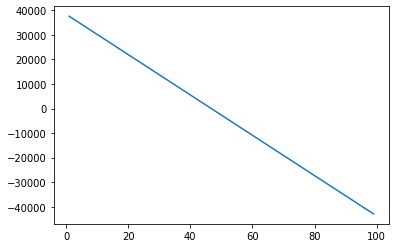

In [72]:
plt.plot(new_input, yhat)